In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset
data_dir = r"C:\Users\saipr\Downloads\archive (13)\brain_tumor_dataset"



datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,         # Random rotation
    width_shift_range=0.2,     # Random width shift
    height_shift_range=0.2,    # Random height shift
    shear_range=0.2,           # Shear
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest'        # Fill mode for new pixels
)


# Load the training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='binary',       # Binary classification
    subset='training'
)

# Load the validation data
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',       # Binary classification
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import vgg16

In [12]:
# Get a batch of images and labels from the training data
images, labels = next(train_data)

# Check the shape of the images
print("Shape of images in the training batch:", images.shape)
print("Shape of labels in the training batch:", labels.shape)

# Get a batch of images and labels from the validation data
val_images, val_labels = next(val_data)

# Check the shape of the images in the validation batch
print("Shape of images in the validation batch:", val_images.shape)
print("Shape of labels in the validation batch:", val_labels.shape)


Shape of images in the training batch: (32, 150, 150, 3)
Shape of labels in the training batch: (32,)
Shape of images in the validation batch: (32, 150, 150, 3)
Shape of labels in the validation batch: (32,)


In [14]:
img_rows,img_cols=150,150
vgg=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(img_rows,img_cols,3))

In [15]:
for layer in vgg.layers:
    layer.trainable=False

In [16]:
#lets print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [23]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Build the model
model = Sequential()

# Add VGG16 as the base
model.add(vgg)

# Flatten the output of the VGG16 model
model.add(Flatten())

# Add custom layers
model.add(Dense(256, activation='relu'))  # Add a dense layer with ReLU activation
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification


In [18]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [20]:
# Fit the model
history = model.fit(train_data, 
                    validation_data=val_data, 
                    epochs=10)


Epoch 1/10


c:\Users\saipr\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6151 - loss: 0.9625 - val_accuracy: 0.6800 - val_loss: 0.5659
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6478 - loss: 0.7710 - val_accuracy: 0.6400 - val_loss: 0.5589
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6810 - loss: 0.6368 - val_accuracy: 0.7600 - val_loss: 0.4351
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6382 - loss: 0.6192 - val_accuracy: 0.8200 - val_loss: 0.4277
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7624 - loss: 0.5479 - val_accuracy: 0.8400 - val_loss: 0.4244
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.7318 - loss: 0.5330 - val_accuracy: 0.8200 - val_loss: 0.4221
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7370 - loss: 0.4873 - val_accuracy: 0.7800 - val_loss: 0.3572
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.7712 - loss: 0.4639 - val_accuracy: 0.8600 - val_loss: 0.3955
Epoch 9/10
7/7 ━━━━

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,007,685 (80.14 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,195,332 (16.00 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
The image is classified as: does not have a brain tumor with a probability of 0.1879


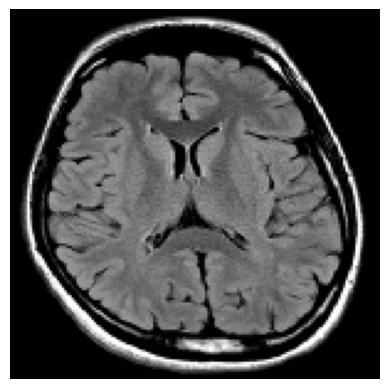

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a new image
img_path = "C:\\Users\\saipr\\Downloads\\archive (13)\\no\\no 95.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
prediction = model.predict(img_array)

# Get the probability and class
probability = prediction[0][0]  # This gives you the probability for class 1
predicted_class = "has a brain tumor" if probability > 0.5 else "does not have a brain tumor"

# Print the results
print(f"The image is classified as: {predicted_class} with a probability of {probability:.4f}")


# Display the image
plt.imshow(img_array[0])  # img_array[0] since img_array has an extra dimension
plt.axis('off')  # Hide axis
plt.show()

